In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
np.random.seed(666)

In [24]:
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] ** 2 < 1.5, dtype="int")

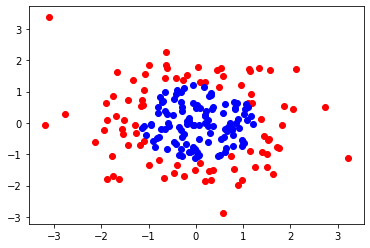

In [25]:
plt.scatter(X[y==0,0], X[y==0,1],color="red")
plt.scatter(X[y==1,0], X[y==1,1],color="blue")
plt.show()

# 使用逻辑回归

In [26]:
from ML.LogisticRegression import LogisticRegression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.score(X, y)

0.605

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == c1, 0],
            y=X[y == c1, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=c1,
            edgecolors="black"
        )

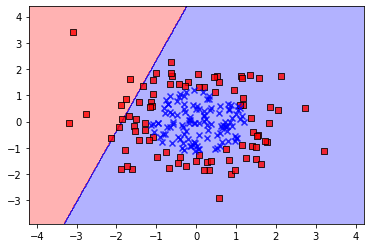

In [29]:
plot_decision_region(X, y, log_reg)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("ploy", PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression())
    ])

In [31]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [32]:
poly_log_reg.score(X, y)

0.95

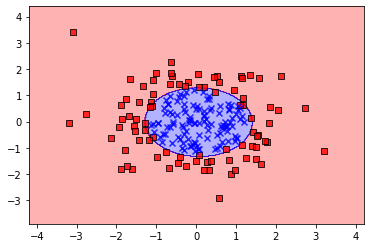

In [33]:
plot_decision_region(X, y, poly_log_reg)

In [34]:
# 增加degree
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('ploy',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [35]:
poly_log_reg2.score(X, y)

0.955

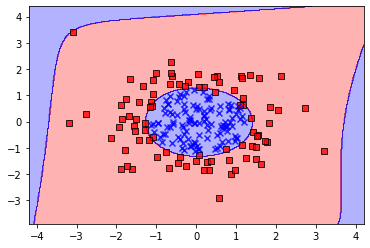

In [36]:
plot_decision_region(X, y, poly_log_reg2)